### Import library yang diperlukan

In [10]:
import numpy as np
import pandas as pd

In [11]:
def generate_population():
    chromosome = [[i, j, k, l, m, n, o, p]
           for i in range(1, 9)
           for j in range(1, 9)
           for k in range(1, 9)
           for l in range(1, 9)
           for m in range(1, 9)
           for n in range(1, 9)
           for o in range(1, 9)
           for p in range(1, 9)
           if all([i != j, i != k, i != l, i != m, i != n, i != o, i != p,
                   j != k, j != l, j != m, j != n, j != o, j != p,
                   k != l, k != m, k != n, k != o, k != p,
                   l != m, l != n, l != o, l != p,
                   m != n, m != o, m != p,
                   n != o, n != p,
                   o != p])]
    chromosome = np.array(chromosome)
    chromosome = pd.DataFrame(chromosome)
    return chromosome

In [12]:
initial_population = generate_population()
initial_population

,0,1,2,3,4,5,6,7
0,1,2,3,4,5,6,7,8
1,1,2,3,4,5,6,8,7
2,1,2,3,4,5,7,6,8
3,1,2,3,4,5,7,8,6
4,1,2,3,4,5,8,6,7
...,...,...,...,...,...,...,...,...
40315,8,7,6,5,4,1,3,2
40316,8,7,6,5,4,2,1,3
40317,8,7,6,5,4,2,3,1
40318,8,7,6,5,4,3,1,2


In [13]:
def fitness(population):
    pop_size = population.shape[0]
    x = 0
    y = 0
    b = 0
    c = 0
    Fit = []
    for k in range(pop_size):
        for i in range(8):
            c = 0
            for j in range(8):
                if(i != j):
                    x = abs(i-j)
                    y = abs(population.iloc[k][i] - population.iloc[k][j])
                    if(x == y):
                        c += 1
        b = 28-c
        Fit.append(b)
    Fitness = np.array(Fit)
    return Fitness

In [14]:
Fitness = fitness(initial_population)
Fitness

array([21, 27, 23, ..., 23, 27, 21])

In [15]:
data = pd.DataFrame(initial_population)
data['Fit'] = pd.DataFrame(Fitness)

In [16]:
data_100 = data.sample(n=100)
data_100 = data_100.reset_index(drop = True)
data_100

,0,1,2,3,4,5,6,7,Fit
0,5,6,1,7,3,2,4,8,28
1,4,2,3,6,5,1,7,8,24
2,4,5,2,7,1,3,8,6,28
3,2,6,8,5,7,3,4,1,26
4,2,1,7,5,6,4,8,3,27
...,...,...,...,...,...,...,...,...,...
95,6,4,7,1,8,3,5,2,27
96,4,7,1,5,2,3,8,6,27
97,5,3,2,6,4,7,1,8,28
98,2,1,5,8,3,6,7,4,26


In [17]:
def selection(data):
    selected_parent = data.sample(n=5)
    selected_parent = selected_parent.sort_values("Fit", ascending=False)
    selected_parent1 = selected_parent.iloc[0]
    selected_parent2 = selected_parent.iloc[1] 
    return selected_parent1[:8], selected_parent2[:8]

In [18]:
def crossover(C1, C2):
    point = np.random.randint((1,7), size=1)
    point = int(point)
    
    C1_1 = C1[:point]
    C1_2 = C1[point:]
    
    C2_1 = C2[:point]
    C2_2 = C2[point:]
    
    C1_tuple = (C1_1, C2_2)
    C1 = np.hstack(C1_tuple)

    C2_tuple = (C2_1, C1_2)
    C2 = np.hstack(C2_tuple)
    return C1, C2

In [19]:
def mutation(ch):
    point1 = np.random.randint(8, size=1)
    point1 = int(point1)
    
    point2 = np.random.randint(8, size=1)
    point2 = int(point2)
    
    first_ele = ch[point1]  
    second_ele = ch[point2]
    
    ch[point1] = second_ele
    ch[point2] = first_ele
    
    return ch

In [20]:
Parent1 = []
Child_Gen1 = []
for i in range(25):
    Pa1, Pa2 = selection(data_100)
    Parent1.append(Pa1)
    Parent1.append(Pa2)
    
    Child1, Child2 = crossover(Pa1, Pa2)

    Child1 = mutation(Child1)
    Child2 = mutation(Child2)
    
    Child_Gen1.append(Child1)
    Child_Gen1.append(Child2)
    
Parent1_df = pd.DataFrame(Parent1)
Parent1_df = Parent1_df.reset_index(drop = True)

Child_Gen1 = pd.DataFrame(Child_Gen1)
Child_Gen1 = Child_Gen1.reset_index(drop = True)

In [21]:
Child_Gen1

,0,1,2,3,4,5,6,7
0,4,8,2,5,7,1,3,6
1,6,3,8,2,1,4,5,7
2,3,5,8,7,2,4,1,6
3,8,2,4,5,1,6,3,7
4,8,6,3,5,1,2,4,7
5,3,4,5,7,6,8,2,1
6,7,8,1,4,3,6,5,2
7,6,5,7,3,8,2,1,4
8,5,3,2,1,4,7,6,8
9,2,7,5,6,8,4,1,3


In [22]:
Gen1_Fitness = fitness(Child_Gen1)
data_Gen1 = Child_Gen1
data_Gen1['Fit'] = pd.DataFrame(Gen1_Fitness)

In [23]:
data_Gen1

,0,1,2,3,4,5,6,7,Fit
0,4,8,2,5,7,1,3,6,28
1,6,3,8,2,1,4,5,7,28
2,3,5,8,7,2,4,1,6,27
3,8,2,4,5,1,6,3,7,28
4,8,6,3,5,1,2,4,7,28
5,3,4,5,7,6,8,2,1,27
6,7,8,1,4,3,6,5,2,27
7,6,5,7,3,8,2,1,4,27
8,5,3,2,1,4,7,6,8,28
9,2,7,5,6,8,4,1,3,28


In [24]:
Parent2 = []
Child_Gen2 = []
for i in range(12):
    Pa1, Pa2 = selection(data_Gen1)
    Parent2.append(Pa1)
    Parent2.append(Pa2)
    
    Child1, Child2 = crossover(Pa1, Pa2)

    Child1 = mutation(Child1)
    Child2 = mutation(Child2)
    
    Child_Gen2.append(Child1)
    Child_Gen2.append(Child2)
    
Parent2_df = pd.DataFrame(Parent2)
Parent2_df = Parent2_df.reset_index(drop = True)

Child_Gen2 = pd.DataFrame(Child_Gen2)
Child_Gen2 = Child_Gen2.reset_index(drop = True)

In [25]:
Child_Gen2

,0,1,2,3,4,5,6,7
0,3,6,5,8,2,4,7,1
1,2,4,7,8,6,3,1,5
2,6,8,5,1,4,2,7,3
3,8,6,3,1,5,2,4,7
4,6,8,2,5,7,1,3,4
5,8,1,2,5,4,6,7,3
6,5,4,2,1,3,7,6,8
7,7,4,3,8,6,2,1,5
8,4,1,2,6,8,3,5,7
9,7,4,3,8,6,2,1,5


In [26]:
Gen2_Fitness = fitness(Child_Gen2)
data_Gen2 = Child_Gen2
data_Gen2['Fit'] = pd.DataFrame(Gen2_Fitness)

In [27]:
data_Gen2

,0,1,2,3,4,5,6,7,Fit
0,3,6,5,8,2,4,7,1,28
1,2,4,7,8,6,3,1,5,27
2,6,8,5,1,4,2,7,3,28
3,8,6,3,1,5,2,4,7,28
4,6,8,2,5,7,1,3,4,26
5,8,1,2,5,4,6,7,3,28
6,5,4,2,1,3,7,6,8,28
7,7,4,3,8,6,2,1,5,28
8,4,1,2,6,8,3,5,7,26
9,7,4,3,8,6,2,1,5,28


In [28]:
Parent3 = []
Child_Gen3 = []
for i in range(6):
    Pa1, Pa2 = selection(data_Gen2)
    Parent3.append(Pa1)
    Parent3.append(Pa2)
    
    Child1, Child2 = crossover(Pa1, Pa2)

    Child1 = mutation(Child1)
    Child2 = mutation(Child2)
    
    Child_Gen3.append(Child1)
    Child_Gen3.append(Child2)
    
Parent3_df = pd.DataFrame(Parent3)
Parent3_df = Parent3_df.reset_index(drop = True)

Child_Gen3 = pd.DataFrame(Child_Gen3)
Child_Gen3 = Child_Gen3.reset_index(drop = True)

In [29]:
Child_Gen3

,0,1,2,3,4,5,6,7
0,3,2,4,8,7,6,5,1
1,4,7,3,8,6,2,1,5
2,4,1,5,2,8,6,7,3
3,8,1,4,5,2,6,7,3
4,6,8,7,5,1,2,4,3
5,4,5,8,2,1,6,3,7
6,5,1,2,4,3,7,6,8
7,4,6,3,1,2,5,7,8
8,6,5,1,7,8,3,4,2
9,1,6,3,4,8,5,7,2


In [30]:
Gen3_Fitness = fitness(Child_Gen3)
data_Gen3 = Child_Gen3
data_Gen3['Fit'] = pd.DataFrame(Gen3_Fitness)

In [31]:
data_Gen3

,0,1,2,3,4,5,6,7,Fit
0,3,2,4,8,7,6,5,1,28
1,4,7,3,8,6,2,1,5,28
2,4,1,5,2,8,6,7,3,28
3,8,1,4,5,2,6,7,3,28
4,6,8,7,5,1,2,4,3,27
5,4,5,8,2,1,6,3,7,28
6,5,1,2,4,3,7,6,8,27
7,4,6,3,1,2,5,7,8,26
8,6,5,1,7,8,3,4,2,28
9,1,6,3,4,8,5,7,2,28


In [32]:
Parent4 = []
Child_Gen4 = []
for i in range(4):
    Pa1, Pa2 = selection(data_Gen3)
    Parent4.append(Pa1)
    Parent4.append(Pa2)
    
    Child1, Child2 = crossover(Pa1, Pa2)

    Child1 = mutation(Child1)
    Child2 = mutation(Child2)
    
    Child_Gen4.append(Child1)
    Child_Gen4.append(Child2)
    
Parent4_df = pd.DataFrame(Parent4)
Parent4_df = Parent4_df.reset_index(drop = True)

Child_Gen4 = pd.DataFrame(Child_Gen4)
Child_Gen4 = Child_Gen4.reset_index(drop = True)

In [33]:
Child_Gen4

,0,1,2,3,4,5,6,7
0,3,2,7,8,4,6,5,1
1,4,6,3,8,7,2,1,5
2,4,5,8,1,2,6,3,7
3,8,1,6,5,2,4,7,3
4,1,6,3,4,2,5,7,8
5,3,2,4,8,7,6,5,1
6,8,5,4,7,2,6,3,1
7,7,6,5,8,4,2,1,3


In [34]:
Gen4_Fitness = fitness(Child_Gen4)
data_Gen4 = Child_Gen4
data_Gen4['Fit'] = pd.DataFrame(Gen4_Fitness)

In [35]:
data_Gen4

,0,1,2,3,4,5,6,7,Fit
0,3,2,7,8,4,6,5,1,27
1,4,6,3,8,7,2,1,5,28
2,4,5,8,1,2,6,3,7,28
3,8,1,6,5,2,4,7,3,28
4,1,6,3,4,2,5,7,8,24
5,3,2,4,8,7,6,5,1,28
6,8,5,4,7,2,6,3,1,27
7,7,6,5,8,4,2,1,3,28


In [36]:
CHILD = data_Gen1.append(data_Gen2)
CHILD = CHILD.append(data_Gen3)
CHILD = CHILD.append(data_Gen4)

In [37]:
CHILD = CHILD.sort_values("Fit", ascending=False)
CHILD = CHILD.reset_index(drop = True)
CHILD.head(10)

,0,1,2,3,4,5,6,7,Fit
0,4,8,2,5,7,1,3,6,28
1,3,6,5,8,2,4,7,1,28
2,3,4,2,8,7,6,5,1,28
3,7,4,3,8,6,2,1,5,28
4,7,4,3,8,6,2,1,5,28
5,5,4,2,1,3,7,6,8,28
6,8,1,2,5,4,6,7,3,28
7,8,6,3,1,5,2,4,7,28
8,6,8,5,1,4,2,7,3,28
9,8,5,4,2,6,3,1,7,28


## PSO

In [38]:
import numpy as np
import multiprocessing as mp
import inspect
from collections import namedtuple
from functools import partial
from attr import attrib, attrs
from attr.validators import instance_of
from matplotlib import animation, cm, colors
import matplotlib.pyplot as plt
from functools import reduce

In [39]:
@attrs
class Designer(object):
    # Overall plot design
    figsize = attrib(type=tuple, validator=instance_of(tuple), default=(10, 8))
    title_fontsize = attrib(validator=instance_of((str, int, float)), default="large")
    text_fontsize = attrib(validator=instance_of((str, int, float)), default="medium")
    legend = attrib(validator=instance_of(str), default="Cost")
    label = attrib(validator=instance_of((str, list, tuple)),default=["x-axis", "y-axis", "z-axis"],)
    limits = attrib(validator=instance_of((list, tuple)),default=[(-1, 1), (-1, 1), (-1, 1)],)
    colormap = attrib(validator=instance_of(colors.Colormap), default=cm.viridis)


In [40]:
@attrs
class Animator(object):
    interval = attrib(type=int, validator=instance_of(int), default=80)
    repeat_delay = attrib(default=None)
    repeat = attrib(type=bool, validator=instance_of(bool), default=True)


In [41]:
@attrs
class Mesher(object):
    func = attrib()
    # For mesh creation
    delta = attrib(type=float, default=0.001)
    limits = attrib(validator=instance_of((list, tuple)), default=[(-1, 1), (-1, 1)])
    levels = attrib(type=list, default=np.arange(-2.0, 2.0, 0.070))
    # Surface transparency
    alpha = attrib(type=float, validator=instance_of(float), default=0.3)
    def compute_history_3d(self, pos_history):
        fitness = np.array(list(map(self.func, pos_history)))
        return np.dstack((pos_history, fitness))

In [42]:
def plot_cost_history(cost_history, ax=None, title="Cost History", designer=None, **kwargs):
    iters = len(cost_history)
    if designer is None:
        designer = Designer(legend="Cost", label=["Iterations", "Cost"])
    if ax is None:
        x, ax = plt.subplots(1, 1, figsize=designer.figsize)
    ax.plot(np.arange(iters), cost_history, "k", lw=2, label=designer.legend)
    ax.set_title(title, fontsize=designer.title_fontsize)
    ax.legend(fontsize=designer.text_fontsize)
    ax.set_xlabel(designer.label[0], fontsize=designer.text_fontsize)
    ax.set_ylabel(designer.label[1], fontsize=designer.text_fontsize)
    ax.tick_params(labelsize=designer.text_fontsize)
    return ax

In [43]:
def _animate(i, data, plot):
    current_pos = data[i]
    if np.array(current_pos).shape[1] == 2:
        plot.set_offsets(current_pos)
    else:
        plot._offsets3d = current_pos.T
    return (plot,)


In [70]:
def plot_contour(pos_history,canvas=None,title="Trajectory",mark=None,designer=None,mesher=None,animator=None,**kwargs):
    if designer is None:
        designer = Designer(limits=[(-1, 1), (-1, 1)], label=["x-axis", "y-axis"])

    if animator is None:
        animator = Animator()
    if canvas is None:
        fig, ax = plt.subplots(1, 1, figsize=designer.figsize)
    else:
        fig, ax = canvas

    n_iters = len(pos_history)
    # Customize plot
    ax.set_title(title, fontsize=designer.title_fontsize)
    ax.set_xlabel(designer.label[0], fontsize=designer.text_fontsize)
    ax.set_ylabel(designer.label[1], fontsize=designer.text_fontsize)
    ax.set_xlim(designer.limits[0])
    ax.set_ylim(designer.limits[1])

    if mesher is not None:
        xx, yy, zz, = _mesh(mesher)
        ax.contour(xx, yy, zz, levels=mesher.levels)
    if mark is not None:
        ax.scatter(mark[0], mark[1], color="red", marker="x")
    plot = ax.scatter(x=[], y=[], c="black", alpha=0.6, **kwargs)
    # Do animation
    anim = animation.FuncAnimation(fig=fig,func=_animate,frames=range(n_iters),fargs=(pos_history, plot),interval=animator.interval,repeat=animator.repeat,repeat_delay=animator.repeat_delay,)
    return anim

In [45]:
def _mesh(mesher):
    """Helper function to make a mesh"""
    xlim = mesher.limits[0]
    ylim = mesher.limits[1]
    x = np.arange(xlim[0], xlim[1], mesher.delta)
    y = np.arange(ylim[0], ylim[1], mesher.delta)
    xx, yy = np.meshgrid(x, y)
    xypairs = np.vstack([xx.reshape(-1), yy.reshape(-1)]).T
    # Get z-value
    z = mesher.func(xypairs)
    zz = z.reshape(xx.shape)
    return (xx, yy, zz)

In [46]:
@attrs
class Swarm(object):
    position = attrib(type=np.ndarray, validator=instance_of(np.ndarray))
    velocity = attrib(type=np.ndarray, validator=instance_of(np.ndarray))
    n_particles = attrib(type=int, validator=instance_of(int))
    dimensions = attrib(type=int, validator=instance_of(int))
    options = attrib(type=dict, default={}, validator=instance_of(dict))
    pbest_pos = attrib(type=np.ndarray, validator=instance_of(np.ndarray))
    best_pos = attrib(type=np.ndarray,default=np.array([]),validator=instance_of(np.ndarray),)
    pbest_cost = attrib(type=np.ndarray,default=np.array([]),validator=instance_of(np.ndarray),)
    best_cost = attrib(type=float, default=np.inf, validator=instance_of((int, float)))
    current_cost = attrib(type=np.ndarray,default=np.array([]),validator=instance_of(np.ndarray),)

    @n_particles.default
    def n_particles_default(self):
        return self.position.shape[0]

    @dimensions.default
    def dimensions_default(self):
        return self.position.shape[1]

    @pbest_pos.default
    def pbest_pos_default(self):
        return self.position


In [47]:
def generate_swarm(n_particles, dimensions, bounds=None, center=1.00, init_pos=None):
    if (init_pos is not None) and (bounds is None):
        pos = init_pos
    elif (init_pos is not None) and (bounds is not None):
        if not (np.all(bounds[0] <= init_pos) and np.all(init_pos <= bounds[1])):
            raise ValueError("User-defined init_pos is out of bounds.")
        pos = init_pos
    elif (init_pos is None) and (bounds is None):
        pos = center * np.random.uniform(low=0.0, high=1.0, size=(n_particles, dimensions))
    else:
        lb, ub = bounds
        min_bounds = np.repeat(np.array(lb)[np.newaxis, :], n_particles, axis=0)
        max_bounds = np.repeat(np.array(ub)[np.newaxis, :], n_particles, axis=0)
        pos = center * np.random.uniform(low=min_bounds, high=max_bounds, size=(n_particles, dimensions))
    return pos

In [48]:
def generate_discrete_swarm(n_particles, dimensions, binary=False, init_pos=None):
    if (init_pos is not None) and binary:
        if not len(np.unique(init_pos)) <= 2:
            raise ValueError("User-defined init_pos is not binary!")
        # init_pos maybe ones
        pos = init_pos
    elif (init_pos is not None) and not binary:
        pos = init_pos
    elif (init_pos is None) and binary:
        pos = np.random.randint(2, size=(n_particles, dimensions))
    else:
        pos = np.random.random_sample(size=(n_particles, dimensions)).argsort(axis=1)
    return pos


In [49]:
def generate_velocity(n_particles, dimensions, clamp=None):
    min_velocity, max_velocity = (0, 1) if clamp is None else clamp
    velocity = (max_velocity - min_velocity) * np.random.random_sample(size=(n_particles, dimensions)) + min_velocity
    return velocity


In [50]:
def create_swarm(n_particles,dimensions,discrete=False,binary=False,options={},bounds=None,center=1.0,init_pos=None,clamp=None,): 
    if discrete:
        position = generate_discrete_swarm(n_particles, dimensions, binary=binary, init_pos=init_pos)
    else:
        position = generate_swarm(n_particles,dimensions,bounds=bounds,center=center,init_pos=init_pos,)
    velocity = generate_velocity(n_particles, dimensions, clamp=clamp)
    return Swarm(position, velocity, options=options)


In [51]:
class HandlerMixin(object):
    """ A HandlerMixing class
    This class offers some basic functionality for the Handlers.
    """
    def _merge_dicts(self, *dict_args):
        """Backward-compatible helper method to combine two dicts"""
        result = {}
        for dictionary in dict_args:
            result.update(dictionary)
        return result

    def _out_of_bounds(self, position, bounds):
        """Helper method to find indices of out-of-bound positions
        This method finds the indices of the particles that are out-of-bound.
        """
        lb, ub = bounds
        greater_than_bound = np.nonzero(position > ub)
        lower_than_bound = np.nonzero(position < lb)
        return (lower_than_bound, greater_than_bound)

    def _get_all_strategies(self):
        """Helper method to automatically generate a dict of strategies"""
        return {k: v for k, v in inspect.getmembers(self, predicate=inspect.isroutine) if not k.startswith(("__", "_"))}


In [52]:
class HandlerMixin(object):
    """ A HandlerMixing class
    This class offers some basic functionality for the Handlers.
    """
    def _merge_dicts(self, *dict_args):
        """Backward-compatible helper method to combine two dicts"""
        result = {}
        for dictionary in dict_args:
            result.update(dictionary)
        return result

    def _out_of_bounds(self, position, bounds):
        """Helper method to find indices of out-of-bound positions
        This method finds the indices of the particles that are out-of-bound.
        """
        lb, ub = bounds
        greater_than_bound = np.nonzero(position > ub)
        lower_than_bound = np.nonzero(position < lb)
        return (lower_than_bound, greater_than_bound)

    def _get_all_strategies(self):
        """Helper method to automatically generate a dict of strategies"""
        return {k: v for k, v in inspect.getmembers(self, predicate=inspect.isroutine) if not k.startswith(("__", "_"))}


In [53]:
class VelocityHandler(HandlerMixin):
    def __init__(self, strategy):
        self.strategy = strategy
        self.strategies = self._get_all_strategies()
        self.memory = None

    def __call__(self, velocity, clamp, **kwargs):
            new_position = self.strategies[self.strategy](velocity, clamp, **kwargs)
            return new_position

    def __apply_clamp(self, velocity, clamp):
        """Helper method to apply a clamp to a velocity vector"""
        clamped_vel = velocity
        min_velocity, max_velocity = clamp
        lower_than_clamp = clamped_vel <= min_velocity
        greater_than_clamp = clamped_vel >= max_velocity
        clamped_vel = np.where(lower_than_clamp, min_velocity, clamped_vel)
        clamped_vel = np.where(greater_than_clamp, max_velocity, clamped_vel)
        return clamped_vel

    def unmodified(self, velocity, clamp=None, **kwargs):
        """Leaves the velocity unchanged"""
        if clamp is None:
            new_vel = velocity
        else:
            if clamp is not None:
                new_vel = self.__apply_clamp(velocity, clamp)
        return new_vel


In [54]:
class op(object):
    def compute_pbest(swarm):
        dimensions = swarm.dimensions
        mask_cost = swarm.current_cost < swarm.pbest_cost
        mask_pos = np.repeat(mask_cost[:, np.newaxis], dimensions, axis=1)
        new_pbest_pos = np.where(~mask_pos, swarm.pbest_pos, swarm.position)
        new_pbest_cost = np.where(~mask_cost, swarm.pbest_cost, swarm.current_cost)
        return (new_pbest_pos, new_pbest_cost)
    
    
    def compute_velocity(swarm, clamp, vh, bounds=None):
        swarm_size = swarm.position.shape
        c1 = swarm.options["c1"]
        c2 = swarm.options["c2"]
        w = swarm.options["w"]
        cognitive = (c1* np.random.uniform(0, 1, swarm_size)*(swarm.pbest_pos - swarm.position))
        social = (c2* np.random.uniform(0, 1, swarm_size)* (swarm.best_pos - swarm.position))
        temp_velocity = (w * swarm.velocity) + cognitive + social
        updated_velocity = vh(temp_velocity, clamp, position=swarm.position, bounds=bounds)
        return updated_velocity
    
    
    def compute_position(swarm, bounds, bh):
        temp_position = swarm.position.copy()
        temp_position += swarm.velocity

        if bounds is not None:
            temp_position = bh(temp_position, bounds)

        position = temp_position
        return position
    
    
    def compute_objective_function(swarm, objective_func, pool=None, **kwargs):
        if pool is None:
            return objective_func(swarm.position, **kwargs)
        else:
            results = pool.map(partial(objective_func, **kwargs),np.array_split(swarm.position, pool._processes),)
            return np.concatenate(results)


In [58]:
class BoundaryHandler(HandlerMixin):
    def __init__(self, strategy):
        
        self.strategy = strategy
        self.strategies = self._get_all_strategies()
        self.memory = None

    def __call__(self, position, bounds, **kwargs):
        new_position = self.strategies[self.strategy](
            position, bounds, **kwargs
        )
        return new_position
    def periodic(self, position, bounds, **kwargs):
        lb, ub = bounds
        lower_than_bound, greater_than_bound = self._out_of_bounds(
            position, bounds
        )
        bound_d = np.tile(
            np.abs(np.array(ub) - np.array(lb)), (position.shape[0], 1)
        )
        ub = np.tile(ub, (position.shape[0], 1))
        lb = np.tile(lb, (position.shape[0], 1))
        new_pos = position
        if lower_than_bound[0].size != 0 and lower_than_bound[1].size != 0:
            new_pos[lower_than_bound] = ub[lower_than_bound] - np.mod(
                (lb[lower_than_bound] - new_pos[lower_than_bound]),
                bound_d[lower_than_bound],
            )
        if greater_than_bound[0].size != 0 and greater_than_bound[1].size != 0:
            new_pos[greater_than_bound] = lb[greater_than_bound] + np.mod(
                (new_pos[greater_than_bound] - ub[greater_than_bound]),
                bound_d[greater_than_bound],
            )
        return new_pos

In [59]:
class Star(object):
    def __init__(self, static=None, **kwargs):
        self.static = static
        self.neighbor_idx = None
        
    def compute_gbest(self, swarm, **kwargs):
        if self.neighbor_idx is None:
            self.neighbor_idx = np.tile(np.arange(swarm.n_particles), (swarm.n_particles, 1))
        if np.min(swarm.pbest_cost) < swarm.best_cost:
            best_pos = swarm.pbest_pos[np.argmin(swarm.pbest_cost)]
            best_cost = np.min(swarm.pbest_cost)
        else:
            best_pos, best_cost = swarm.best_pos, swarm.best_cost
        return (best_pos, best_cost)

    def compute_velocity(self,swarm,clamp=None,vh=VelocityHandler(strategy="unmodified"),bounds=None,):
        return op.compute_velocity(swarm, clamp, vh, bounds=bounds)

    def compute_position(self, swarm, bounds=None, bh=BoundaryHandler(strategy="periodic")):
        return op.compute_position(swarm, bounds, bh)
    

In [57]:
class GlobalBestPSO(object):
    """For running Schwefel and set bounds = (min_bound,max_bound)"""
#     max_bound = 480*np.ones(2)
#     min_bound = 390*np.ones(2)
    def __init__(self,n_particles,dimensions,options,bounds=None,bh_strategy="periodic",velocity_clamp=None,vh_strategy="unmodified",center=1.00,ftol=-np.inf,init_pos=None,):
        self.n_particles = n_particles
        self.dimensions = dimensions
        self.bounds = bounds
        self.velocity_clamp = velocity_clamp
        self.swarm_size = (n_particles, dimensions)
        self.options = options
        self.center = center
        self.ftol = ftol
        self.init_pos = init_pos
        self.ToHistory = namedtuple(
            "ToHistory",
            [
                "best_cost",
                "mean_pbest_cost",
                "mean_neighbor_cost",
                "position",
                "velocity",
            ],
        )
        self.reset()
        # Initialize the topology
        self.top = Star()
        self.bh = BoundaryHandler(strategy=bh_strategy)
        self.vh = VelocityHandler(strategy=vh_strategy)
        self.name = __name__
        
    def _populate_history(self, hist):
        self.cost_history.append(hist.best_cost)
        self.mean_pbest_history.append(hist.mean_pbest_cost)
        self.mean_neighbor_history.append(hist.mean_neighbor_cost)
        self.pos_history.append(hist.position)
        self.velocity_history.append(hist.velocity)
    
    def reset(self):
        # Initialize history lists
        self.cost_history = []
        self.mean_pbest_history = []
        self.mean_neighbor_history = []
        self.pos_history = []
        self.velocity_history = []
        # Initialize the swarm
        self.swarm = create_swarm(n_particles=self.n_particles,dimensions=self.dimensions,bounds=self.bounds,center=self.center,init_pos=self.init_pos,clamp=self.velocity_clamp,options=self.options,)

    def optimize(self, objective_func, iters, n_processes=None, **kwargs):

        print("Optimize for {} iters with {}".format(iters, self.options))
        self.bh.memory = self.swarm.position
        self.vh.memory = self.swarm.position
        pool = None if n_processes is None else mp.Pool(n_processes)

        self.swarm.pbest_cost = np.full(self.swarm_size[0], np.inf)
        for i in range(iters):
            self.swarm.current_cost = op.compute_objective_function(self.swarm, objective_func, pool=pool, **kwargs)
            self.swarm.pbest_pos, self.swarm.pbest_cost = op.compute_pbest(self.swarm)
            best_cost_yet_found = self.swarm.best_cost
            self.swarm.best_pos, self.swarm.best_cost = self.top.compute_gbest(self.swarm)
            hist = self.ToHistory(best_cost=self.swarm.best_cost,mean_pbest_cost=np.mean(self.swarm.pbest_cost),mean_neighbor_cost=self.swarm.best_cost,position=self.swarm.position,velocity=self.swarm.velocity,)
            self._populate_history(hist)
            relative_measure = self.ftol * (1 + np.abs(best_cost_yet_found))
            if (np.abs(self.swarm.best_cost - best_cost_yet_found)< relative_measure):
                break
            self.swarm.velocity = self.top.compute_velocity(self.swarm, self.velocity_clamp, self.vh, self.bounds)
            self.swarm.position = self.top.compute_position(self.swarm, self.bounds, self.bh)
        # Obtain the final best_cost and the final best_position
        final_best_cost = self.swarm.best_cost.copy()
        final_best_pos = self.swarm.pbest_pos[self.swarm.pbest_cost.argmin()].copy()
        # Write report in log and return final cost and position
        print("Optimization finished | best cost: {}, best pos: {}".format(final_best_cost, final_best_pos))

        return (final_best_cost, final_best_pos)


In [60]:
class fx(object):
    def michalewicz(y):
        x = y.T
        result = reduce(lambda acc, x: acc + np.sin(x) * np.power(np.sin((0 + 1) * np.power(x, 2) / np.pi), 2 * 10), x, 0.)
        return -1.0*result
    
    def ackley(x):
        d = x.shape[1]
        j = (-20.0 * np.exp(-0.2 * np.sqrt((1 / d) * (x ** 2).sum(axis=1)))- np.exp((1 / float(d)) * np.cos(2 * np.pi * x).sum(axis=1))+ 20.0+ np.exp(1))
        return j
 
    def easom(x):
        x_ = x[:, 0]
        y_ = x[:, 1]
        j = (-1* np.cos(x_)* np.cos(y_)* np.exp(-1 * ((x_ - np.pi) ** 2 + (y_ - np.pi) ** 2)))
        return j
    
    def rastrigin(x):
        #x between -5.12 to 5.12
        d = x.shape[1]
        j = 10.0 * d + (x ** 2.0 - 10.0 * np.cos(2.0 * np.pi * x)).sum(axis=1)
        return j
    
    def rosenbrock(x):
        r = np.sum(100 * (x.T[1:] - x.T[:-1] ** 2.0) ** 2 + (1 - x.T[:-1]) ** 2.0, axis=0)
        return r
    def yang(y):
        temp1 = 0
        temp2 = 0
        x = y.T
        for i in range(min(len(x),16)):
            temp2+=np.sin(np.power(x[i],2))
            temp1+=np.absolute(x[i])
        ans =  temp1*np.exp(-1*temp2)
        return ans
    def griewank(y):
        x = y.T
        ans = 1.0
        inner_product = 1.0
        inner_sum = 0.0
        for i in range(len(x)):
            inner_sum += x[i] ** 2
            inner_product *= np.cos(x[i] / np.sqrt(i + 1))
        ans += inner_sum * (1.0 / 4000.0) - inner_product
        return ans
    def schwefel(y):
        x=y.T
        alpha=418.982887
        fitness=alpha*len(x)
        for i in range(min(len(x),128)):
            fitness-=x[i]*np.sin(np.sqrt(np.abs(x[i])))
        return fitness

    def shubert(y):
        x = y.T
        temp1 = 0
        temp2 = 0
        i=0
        while i < (5): #Change to while
            temp1 += ((i+1)*np.cos((i+1)+(i+2)*x[0]))
            temp2 += ((i+1)*np.cos((i+1)+(i+2)*x[1]))
            i+=1
        return temp1*temp2
    def dejong(y):
        x = y.T
        ans = 0
        for i in range(min(len(x),256)):
            ans+=np.power(x[i],4)
        return ans

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: -1.6023585612700044, best pos: [2.20012922 2.20015115]


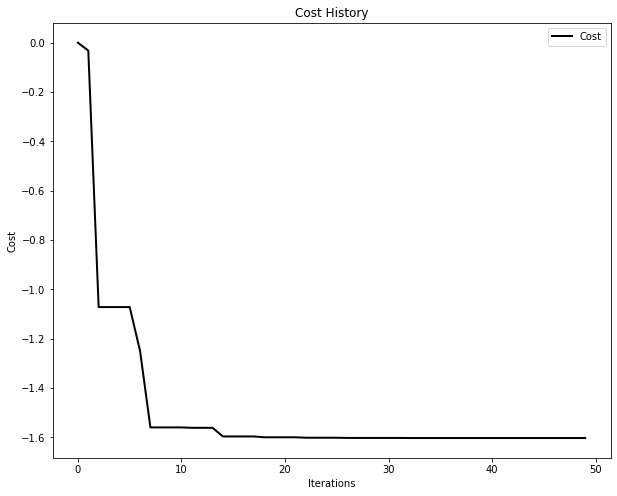

<ipython-input-44-7bf2d138815c>:22: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)
[gif @ 0x5569e46a8600] GIF muxer supports only a single video GIF stream.
Could not write header for output file #0 (incorrect codec parameters ?): Invalid argument
Error initializing output stream 0:0 -- 



CalledProcessError: ignored

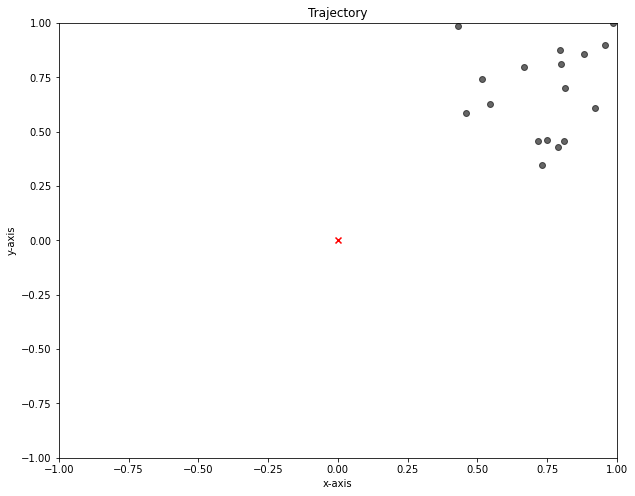

In [61]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.michalewicz, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.michalewicz)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2D_michalewicz.gif")

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: 0.001514012467521031, best pos: [-0.00033407 -0.00041482]


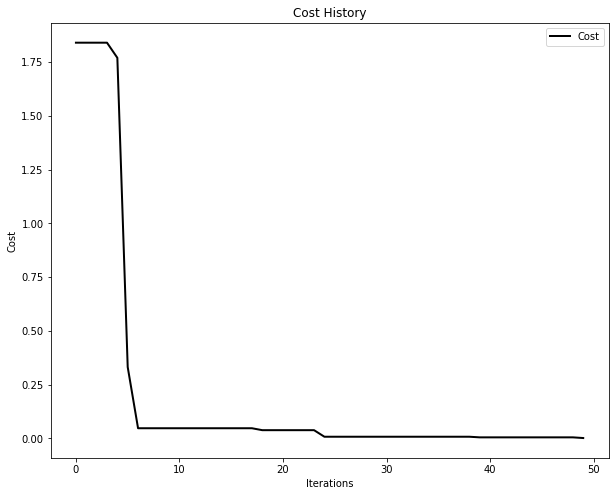

AttributeError: ignored

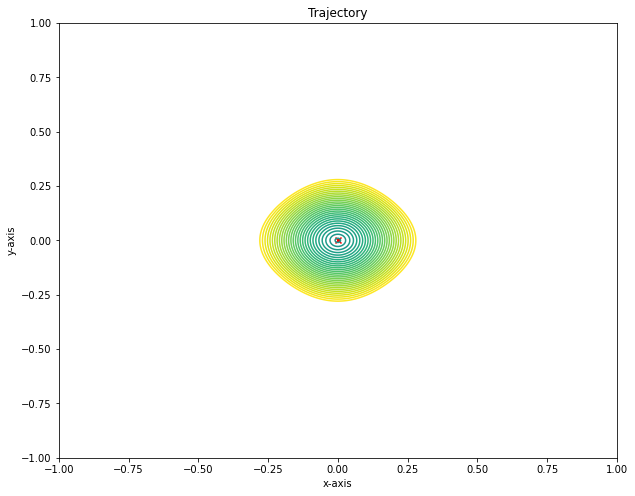

In [62]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.ackley, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.ackley)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2D_ackley.gif")

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: -0.9999825779096094, best pos: [3.1438608  3.14413634]


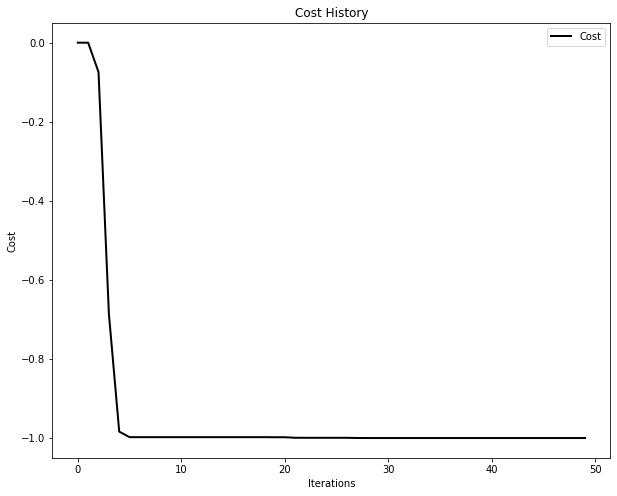

<ipython-input-44-7bf2d138815c>:22: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, zz, levels=mesher.levels)


AttributeError: ignored

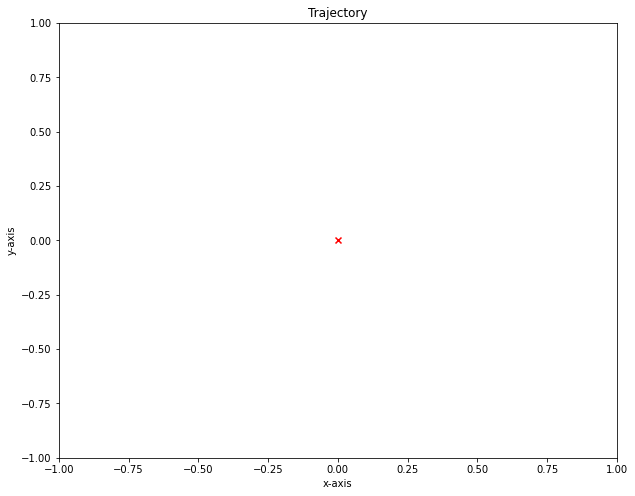

In [63]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.easom, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.easom)
animation = plot_contour(pos_history=optimizer.pos_history,mesher=m,mark=(0,0))

animation.save("PSO2D_easom.gif")


Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: 0.9949649456301977, best pos: [9.95047250e-01 1.47760004e-04]


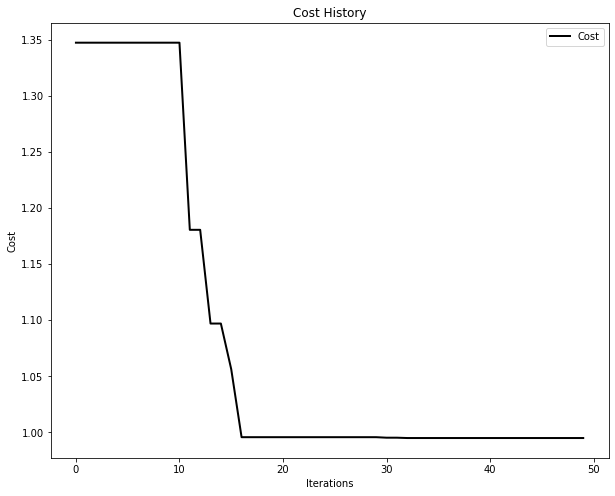

AttributeError: ignored

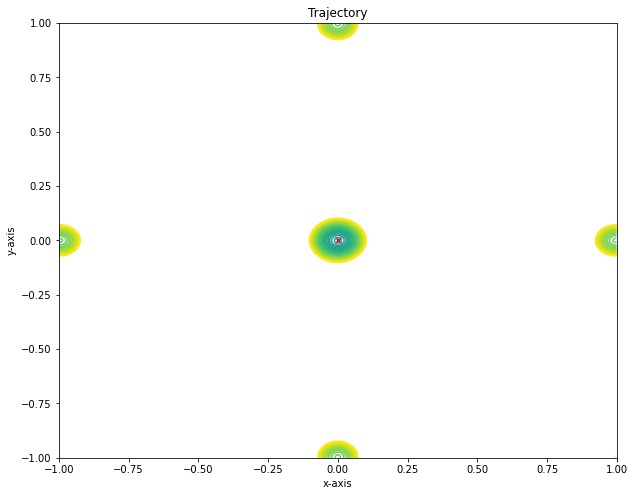

In [65]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.rastrigin, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.rastrigin)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2D_rastrigin.gif")

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: 0.0011069635906629136, best pos: [0.96927584 0.93821898]


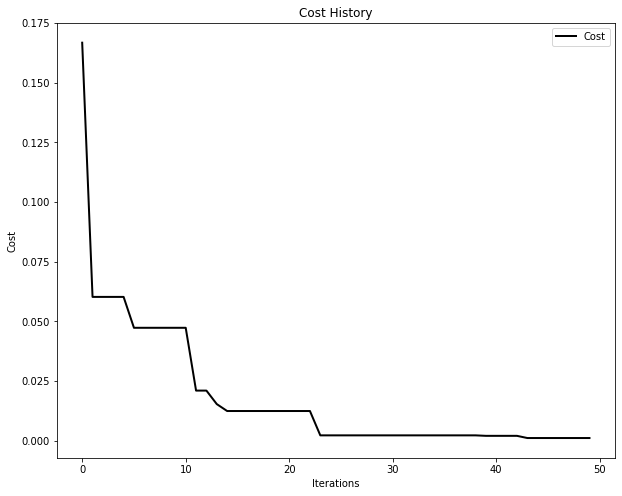

AttributeError: ignored

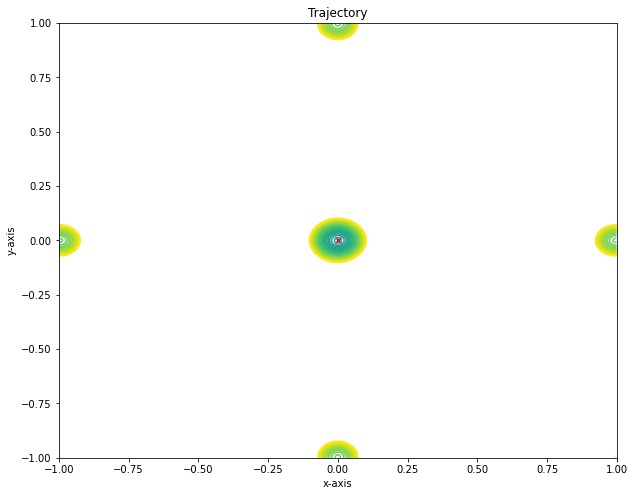

In [66]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.rosenbrock, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.rastrigin)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2D_rosenbrock.gif")

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: 0.002595085957679711, best pos: [ 0.00075502 -0.00184008]


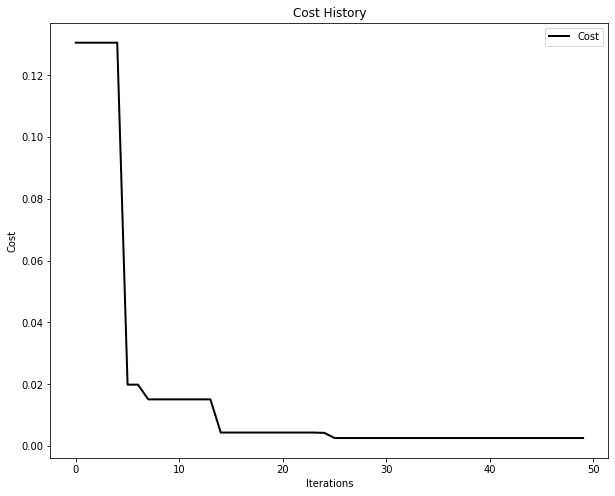

AttributeError: ignored

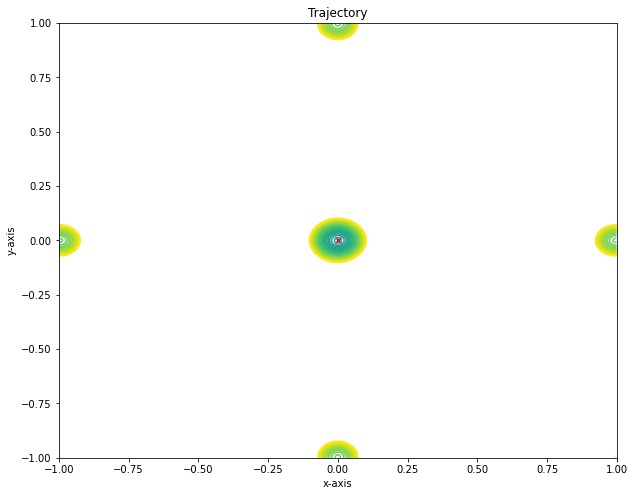

In [67]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.yang, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.rastrigin)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2D_yang.gif")

In [ ]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.griewank, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.schwefel)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2Ds_griewank.gif")

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: 2.1611109838150443e-11, best pos: [-0.00095641  0.00213492]


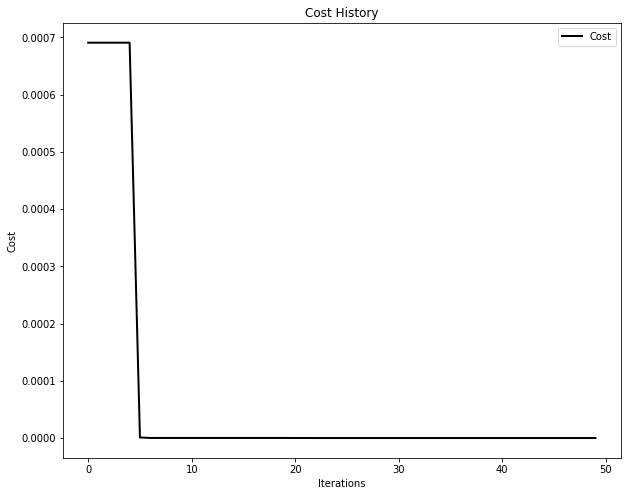

AttributeError: ignored

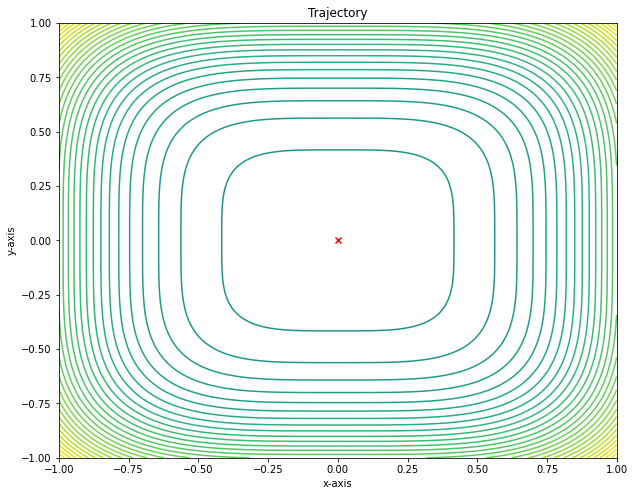

In [68]:
options = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.dejong, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.dejong)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2Ds_dejong.gif")

Optimize for 50 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
Optimization finished | best cost: 8.086622690704845e-13, best pos: [0.00094658 0.00027631]


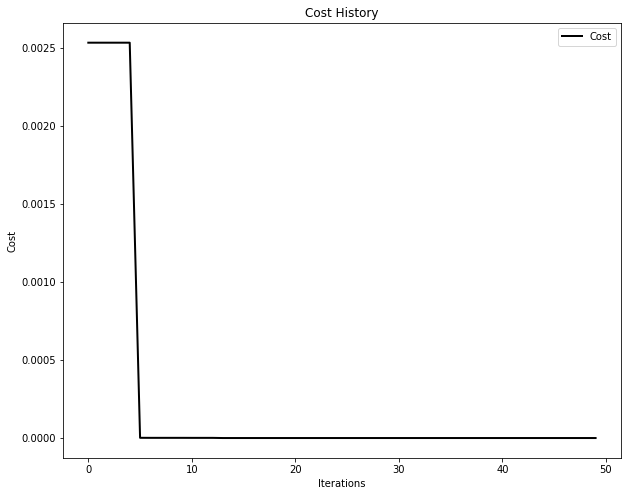

AttributeError: ignored

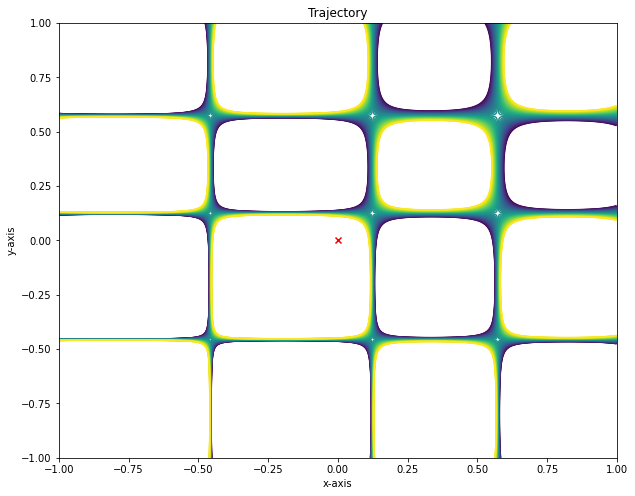

In [69]:
ptions = {'c1':0.5, 'c2':0.3, 'w':0.9}
optimizer = GlobalBestPSO(n_particles=50, dimensions=2, options=options)
cost, pos = optimizer.optimize(fx.dejong, iters=50)

plot_cost_history(cost_history=optimizer.cost_history)
plt.show()
m = Mesher(func=fx.shubert)
animation = plot_contour(pos_history=optimizer.pos_history,
                         mesher=m,
                         mark=(0,0))

animation.save("PSO2Ds_shubert.gif")